Notebook to combine and bin data for the NHL from 2014-2019

In [51]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
data1 = "nhl odds 2014-15.csv"
data2 = "nhl odds 2015-16.csv"
data3 = "nhl odds 2016-17.csv"
data4 = "nhl odds 2017-18.csv"
data5 = "nhl odds 2018-19.csv"

# Read the mouse data and the study results
data1 = pd.read_csv(data1)
data2 = pd.read_csv(data2)
data3 = pd.read_csv(data3)
data4 = pd.read_csv(data4)
data5 = pd.read_csv(data5)


In [90]:
#put the frames of the different seasons into a list
frames = [data1, data2, data3, data4, data5]

#stack the frames into a single set for analysis
df = pd.concat(frames)
df2 = pd.concat(frames)
away_df = df[df['VH']=='V'].reset_index()
home_df = df[df['VH']=='H'].reset_index()



df.reset_index()

,index,Date,Rot,VH,Team,1st,2nd,3rd,Final,Open,Close,Puck Line,Unnamed: 11,Open OU,Unnamed: 13,Close OU,Unnamed: 15
0,0,1008,1,V,Montreal,1,1,2,4,-105,-105,1.5,-305.0,5.5,106,5.5,110
1,1,1008,2,H,Toronto,2,0,1,3,-115,-115,-1.5,250.0,5.5,-126,5.5,-130
2,2,1008,3,V,Philadelphia,0,0,1,1,165,165,1.5,-180.0,5.5,123,5.5,115
3,3,1008,4,H,Boston,1,0,1,2,-195,-185,-1.5,155.0,5.5,-143,5.5,-135
4,4,1008,5,V,SanJose,1,3,0,4,101,130,1.5,-240.0,5.5,127,5.0,-136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13335,2711,606,10,H,Boston,0,0,1,1,-155,-160,-1.5,176.0,5.5,-110,5.5,-135
13336,2712,609,11,V,Boston,1,0,4,5,100,105,1.5,-280.0,5.0,-110,5.0,-150
13337,2713,609,12,H,St.Louis,0,0,1,1,-120,-115,-1.5,230.0,5.0,-110,5.0,130
13338,2714,612,13,V,St.Louis,2,0,2,4,151,155,1.5,-183.0,5.5,-110,5.0,-120


In [109]:
# away_df
df.iloc[6]
df.iloc[7]


Date              1008
Rot                  8
VH                   H
Team           Calgary
1st                  0
2nd                  2
3rd                  0
Final                2
Open               111
Close              106
Puck Line          1.5
Unnamed: 11       -275
Open OU            5.5
Unnamed: 13       -143
Close OU             5
Unnamed: 15        120
Point Dif           -2
Name: 7, dtype: object

<BarContainer object of 2 artists>

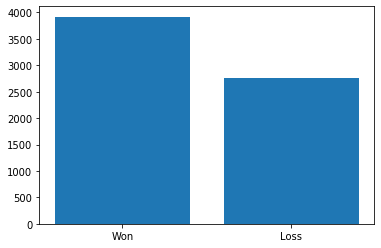

In [133]:
p_dif = []

for i in range(1, df.shape[0], 2):
        home_dif = df['Final'].iloc[i] - df['Final'].iloc[i-1]
        away_dif = df['Final'].iloc[i-1] - df['Final'].iloc[i]
        p_dif.append(away_dif)
        p_dif.append(home_dif)

        
df['Point Dif'] = p_dif
df.reset_index()

fav = []

for i in range(1,df.shape[0], 2):
    if (df['Close'].iloc[i] < df['Close'].iloc[i-1]):
        fav.append(df.iloc[i])
    else:
        fav.append(df.iloc[i-1])

fav
fav_df = pd.DataFrame(fav)
fav_df



def set_winner(row):
    if row['Point Dif'] > 0:
        return 'Won'
    else:
        return 'Loss'
        
new_df = fav_df.assign(Result=fav_df.apply(set_winner, axis=1)) 

# winner = fav_df['Point Dif'] > 0 
# loser = fav_df['Point Dif'] < 0 

# favored_win = fav_df[winner]
# favored_win
# favored_win.assign(Result='Won')




new_df['Result'].value_counts()
win_loss = ['Won','Loss']
plt.bar(win_loss,new_df['Result'].value_counts())

In [66]:
# winner = df['Point Dif'] > 0 
# loser = df['Point Dif'] < 0 
# win = df[winner]
# win.loc[win['VH'] == 'H']


# x = df.reset_index()


# g = x[x['Puck Line'] > 1.5].index
# l = x[x['Puck Line'] < -1.5].index


# x1 = x.drop(g | l)
# # x1['Puck Line'].value_counts()
# w = x1['Point Dif'] > 0 
# l = x1['Point Dif'] < 0




# w1 = x1[w]
# l1 = x1[l]
# # plt.scatter(x1['Puck Line'],x1['Point Dif'])
# # plt.scatter( x1[l]['Close'], x1[l]['Point Dif'] )

# fav = x1['Close'] < 0
# under = x1['Close'] > 0
# len(w1[fav])
# len(w1[under])
# los = df[loser]
# los.loc[los['VH'] == 'V']